# Reinforcement Learning Solution to the Towers of Hanoi Puzzle

Prashant Kumar Thakur

For this assignment, I will use reinforcement learning to solve the [Towers of Hanoi](https://en.wikipedia.org/wiki/Tower_of_Hanoi) puzzle.  

To accomplish this, I have modified the code discussed in lecture for learning to play Tic-Tac-Toe.  Modify the code  so that it learns to solve the three-disk, three-peg
Towers of Hanoi Puzzle.  
Steps required to do this include the following:

  - Represent the state, and use it as a tuple as a key to the Q dictionary. This is done by a function called `stateMoveTuple` which returns the tuple formatted state,move.
  - `validMoves` function is implemented to check for the valid moves from a given state. This returns the list of moves which means the peg on the top of first value should be moved to the next peg.
  - Assign reinforcement of $-1$ to each move unless it is a move to the goal state, for which the reinforcement is $0$.  This represents the goal of finding the shortest path to the goal.

A plot of the number of steps required to reach the goal for each
trial is computed and matplotlib is used to depict the progress of the training.

## Requirements

The program keeps track of which disks are on which pegs by representing the state as a list which consists of three lists with the value in it. Name the disks 1, 2, and 3, with 1 being the smallest disk and 3 being the largest.

For example, the starting state with all disks being on the left peg would be `[[1, 2, 3], [], []]`.  After moving disk 1 to peg 2, we have `[[2, 3], [1], []]`.

To represent that move we just made, a list of two peg numbers, like `[1, 2]`, representing a move of the top disk on peg 1 to peg 2.

Now on to some functions. Define at least the following functions. Examples showing required output appear below.

   - `printState(state)`: prints the state in the form shown below
   - `validMoves(state)`: returns list of moves that are valid from `state`
   - `makeMove(state, move)`: returns new (copy of) state after move has been applied.
   - `trainQ(nRepetitions, learningRate, epsilonDecayFactor, validMovesF, makeMoveF)`: train the Q function for number of repetitions, decaying epsilon at start of each repetition. Returns Q and list or array of number of steps to reach goal for each repetition.
   - `testQ(Q, maxSteps, validMovesF, makeMoveF)`: without updating Q, use Q to find greedy action each step until goal is found. Return path of states.

A function that you might choose to implement is

   - `stateMoveTuple(state, move)`: returns tuple of state and move.  
    
This is useful for converting state and move to a key to be used for the Q dictionary.

### Description of functions

#### `printState`
The function `printState` computes the length of the state function so [[1,2],[3],[]] would return the length of each individual list in the state as [2,1,0]. Based on the maximum length of the individual list (or say peg), the padding is done to add a blank into the cell to create a uniform list of same size. Therefore, the above state becomes [[1,2],[' ',3],[' ',' ']]. Finally the state is turned into a numpy array and based on the maximum number of elements on a peg, the uniform array is created and then the element of each column is joined to form a string. Finally, the value is printed. So for the above case the "1blankblank" and "2 3blank" string that would be printed.

#### `validMoves`
The function `validMoves` checks for the disk on the peg and compute if the value to be moved from peg1 to peg2 is higher or lower. There could be two conditions to determine the valid move $(1)$ Either the peg2 is empty-- in this case any disk from peg1 can be moved to peg2 $(2)$ Peg2 has higher valued disk than the disk to be moved from peg1 -- this is also a valid move as the lower valued disk can be added on top of higher valued disk. This check has been done for all three pegs and if the move is valid the step to move from one peg to another is appended into the list which is finally returned as the list of valid moves. For example, for a state [[1,2],[3],[]], "1" can be moved from peg1 to peg2(as disk present 3>1) and similarly to peg3 (as empty); also "3" can be moved from peg2 to peg3 as peg3 is empty so the resulting valid steps are returned as [[1,2],[1,3],[2,3]].

#### `makeMove`
The function `makeMove` moves the top-most disk present on the source peg to the destination peg. For example, for the state [[1,2],[3],[]] and move [1,2] the function would move disk1 to peg2 and return the final state as [[2],[1,3],[]]. NOTE: the validity of the move is not checked as it is believed the state and move passed to it would be valid. Inorder to do this the first value of the source peg is removed from the list and it is added at the begining of the list for destination peg.

#### `stateMoveTuple`
The function `stateMoveTuple` is used to compute the tuple representation for storing the state,move pair to work as a key to the Q. 

In [1]:
import numpy as np
import copy
import random
def padding(state):
    clone = copy.deepcopy(state)
    length = list(map(lambda x: len(x), state))
    # Pad blank at the beginning
    for val in clone:
        if len(val) < max(length):
            for i in range(max(length) - len(val)):
                val[:0] = ' '
    return clone
def printState(state):
    # clone = copy.deepcopy(state)
    length = list(map(lambda x: len(x), state))
    clone = padding(state)
    np_state = np.array(clone)
    for i in range(max(length)):
        print(' '.join(str(v) for v in np_state[:3, i]))
    print('------')

def validMoves(state):
    length = list(map(lambda x: len(x), state))
    result = []
    for i in range(3):
        # check peg1
        if length[0] > 0:
            top = state[0][0]
            if length[1] == 0 or state[1][0] > top:
                result.append([1,2])
            if length[2] == 0 or state[2][0] > top:
                result.append([1,3])
        # check peg2
        if length[1] > 0:
            top = state[1][0]
            if length[0] == 0 or state[0][0] > top:
                result.append([2,1])
            if length[2] == 0 or state[2][0] > top:
                result.append([2,3])
        # check peg3
        if length[2] > 0:
            top = state[2][0]
            if length[0] == 0 or state[0][0] > top:
                result.append([3,1])
            if length[1] == 0 or state[1][0] > top:
                result.append([3,2])
        return result

def makeMove(state, move):
    clone = copy.deepcopy(state)
    top = clone[move[0]-1][0]
#     if clone[move[1]-1] == 0 or top < clone[move[1]-1][0]:
    clone[move[0] - 1].remove(top)
    clone[move[1]-1][:0] = [top]
#     else:
#         print("Higher value added on top of lower value.")
#         return 
    return clone

def stateMoveTuple(state, move):
    return tuple((tuple((tuple(state[0]),tuple(state[1]),tuple(state[2]))),tuple(move)))

def epsilonGreedy(epsilon, Q, state,validMoves):
    valid_moves = validMoves(state)
    if np.random.uniform() < epsilon:
        # Random Move
        return random.sample(valid_moves,1)[0]
    else:
        # Greedy Move
        Qs = np.array([Q.get(stateMoveTuple(state,m), -1) for m in valid_moves])
        return valid_moves[np.argmin(Qs)]

#### `trainQ`
The function `trainQ` is a modification of the trainQ function from professor's lecture slide which takes the number of game repitition (i.e. the number of times the game would be played by the machine to adjust the Q variable to get better approximate of different states and what is the probablity/cost to take to the goal state. The epsilon is multiplied by a decaying factor for each game and the move to be taken for a given state is computed randomly with a function `epsilonGreedy` which computes the random value and compares it with the epsilon if smaller generates a random move. Else the state which leads to minimal steps towards the goal is returned greedly. In case the state is not present in the Q variable, then the value is set to $-1$ so that the state,move combination that is not seen by the function is added into the Q state as we are returning the minimum value possible for a given state and move. Based on the move and state, the Q is updated and unless it is a goal state, the parameter for the Q is updated based on the temporal difference method. In case the goal state is reached the reinforcement of 0 is added to it to denote that the goal has been reached. Finally, after the number of repetitions the Q function holds the estimated cost to reach the goal from most of the possible state,move pair. Based on the Q value we can decide which move we should take to reach the goal with lower number of steps.

In [2]:
def trainQ(nRepetitions, learningRate, epsilonDecayFactor, validMoves, makeMove,disk=3):
    epsilon = 1.0
    Q = {}
    steps = []
    for nGames in range(nRepetitions):
        epsilon *= epsilonDecayFactor
        step = 0
        val=[]
        for i in range(disk):
            val.append(i+1)
            state = [val,[],[]]
            goal = [[],[],val]

        done = False

        while not done:
            step += 1
            move = epsilonGreedy(epsilon, Q, state,validMoves)
            stateNew = makeMove(state,move)
            if stateMoveTuple(state,move) not in Q:
                Q[stateMoveTuple(state,move)] = -1  # initial Q value for new board,move

            if stateNew == goal:
                Q[stateMoveTuple(state,move)] = 0
                done = True

            if step > 1:
                TDError = (1 + Q.get(stateMoveTuple(state,move)) - Q.get(stateMoveTuple(stateOld,moveOld)))
                Q[stateMoveTuple(stateOld, moveOld)] += learningRate * TDError

            stateOld, moveOld = state, move  # remember board and move to Q(board,move) can be updated after next steps
            state = stateNew
        steps.append(step)
        
    return (Q,np.array(steps))

#### `testQ`
The function `testQ` takes the Q as its arguments and the maximum number of steps to look through the Q vairable to reach the goal state. The validMoves and makeMoves function are also passed to compute the valid moves and make the move as necessary. The function takes in a initial state and computes the move using the epsilonGreedy function. NOTE: the epsilon value 0 is passed into this function to ensure that the Q is used to compute the move based on the trained dataset. So for a given state and given valid moves, epsilonGreedy would return the state,move pair with lowest value. So we always try to find the moves based on the learned Q variable. Then the move is made and the state is appended into the list so that they can be later used as the path followed. In case the number of maxSteps is not sufficient to reach the goal state for 3 disk problem [[],[],[1,2,3]], a message is displayed complaining the iteration are low. 

In [3]:
def testQ(Q, maxSteps, validMoves, makeMove,disk=3):
    states = []
    val = []
    for i in range(disk):
        val.append(i+1)
        state = [val,[],[]]
        goal = [[],[],val]
    step = 0
    states.append(state)
    while state!= goal and step < maxSteps:
        move = epsilonGreedy(0, Q, state,validMoves)
        state = makeMove(state, move)
        states.append(state)
        step +=1
    if state != goal:
        return "Insufficient iteration to reach goal. Increase the iteration."
    return states

# Examples

In [4]:
state = [[1, 2, 3], [], []]
printState(state)

1    
2    
3    
------


In [5]:
move =[1, 2]

stateMoveTuple(state, move)

(((1, 2, 3), (), ()), (1, 2))

In [6]:
newstate = makeMove(state, move)
newstate

[[2, 3], [1], []]

In [7]:
printState(newstate)

2    
3 1  
------


In [71]:
Q, stepsToGoal = trainQ(100, 0.5, 0.7, validMoves, makeMove)

In [72]:
stepsToGoal

array([115,  63, 155,  64,  27,  27,  26,  23,  18,  27,  30,  11,   7,
        11,  12,  11,   8,  26,  24,   7,   7,   9,   9,   7,   7,  27,
         7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,
         7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,
         7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,
         7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,
         7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,
         7,   7,   7,   7,   7,   7,   7,   7,   7])

#### Plot of steps to reach goal.

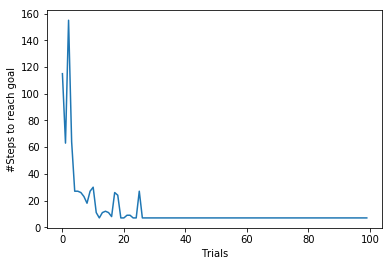

In [73]:
import matplotlib.pyplot as plt
plt.plot(stepsToGoal)
plt.ylabel('#Steps to reach goal')
plt.xlabel('Trials')
plt.show()

In [74]:
path = testQ(Q, 20, validMoves, makeMove)

In [75]:
path

[[[1, 2, 3], [], []],
 [[2, 3], [], [1]],
 [[3], [2], [1]],
 [[3], [1, 2], []],
 [[], [1, 2], [3]],
 [[1], [2], [3]],
 [[1], [], [2, 3]],
 [[], [], [1, 2, 3]]]

In [76]:
for s in path:
    printState(s)
    print()

1    
2    
3    
------

2    
3   1
------

3 2 1
------

  1  
3 2  
------

  1  
  2 3
------

1 2 3
------

    2
1   3
------

    1
    2
    3
------



#### Extra Credit- 1

## Implentation of new graphical state print.

The following function is designed to represent the disks as rectangular boxes with the size equal to the value i.e. 1,2,3,4 etc. The function is generic and can handle different numbers of disks. However, if the number of disks increases over 6, it needs some tuning to change the axes range (which can also be included by using the maximum value of the disk) and increase the color in the color list. However, a generic value has been choosen. The matplotlib has been used to display the blocks. A rod (orange) is separated based on the number of disk to be considered so that the disk doesn't overlap and the distance between the rod is uniform. The distance is calculated with the reference to the largest disk such that if there were 3 largest disk and they were to be placed on each peg then there should be a uniform separation between those disks at 3 pegs. Similarly, the height of the peg is also adjusted so that adding number of disks would still give a proportional height. Finally, the disks(rectangular blocks) are drawn around the peg such that the peg is at the middle of those disks.

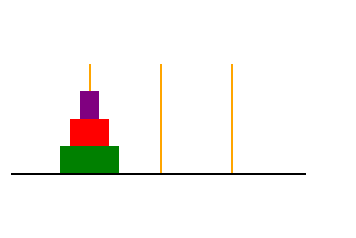

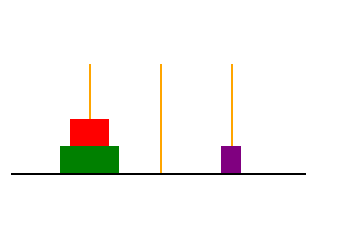

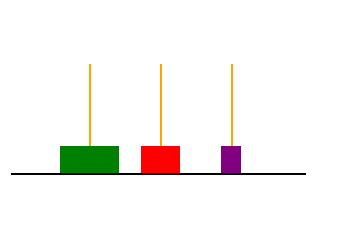

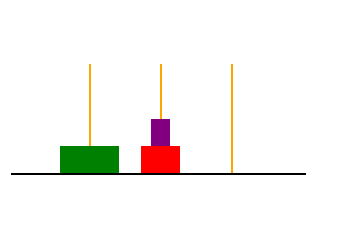

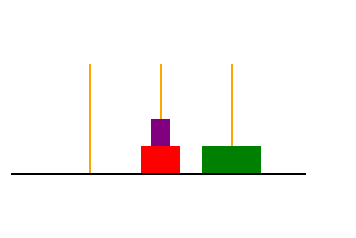

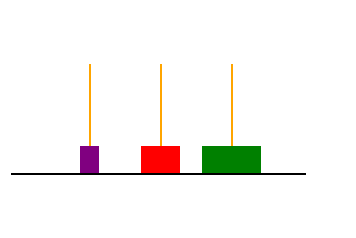

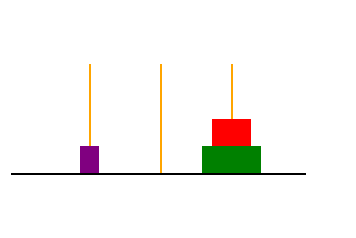

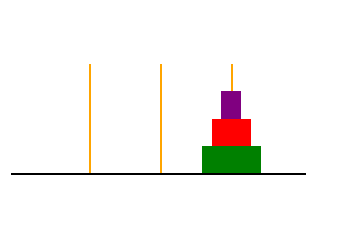

In [77]:
import matplotlib.patches as mpatch
import matplotlib.pyplot as plt
%matplotlib inline

def draw(plist):
    fig = plt.figure()
    axes = fig.add_subplot(1,1,1)
    axes.xaxis.set_visible(False)
    axes.yaxis.set_visible(False)

    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
    axes.spines['bottom'].set_visible(False)
    axes.spines['left'].set_visible(False)
    height = 0.5
    color = ["purple","red","green","blue","yellow", "pink"]
    idx = 0
    rod_l = list(map(lambda x: max(x) if len(x) > 0 else 0, plist))
    rod = []
    xr = 2
    factor = 2 + 0.8 * (max(rod_l)-1)
    for l in range(3): 
        rod.append(xr)
        xr += factor 
    axes.set_xlim([-2,15])
    axes.set_ylim([-1,3])
    r_ht = max(rod_l)*0.5 + 0.5
    axes.add_patch(mpatch.Rectangle((rod[0],0),.08,r_ht,facecolor="orange"))
    axes.add_patch(mpatch.Rectangle((rod[1],0),.08,r_ht,facecolor="orange"))
    axes.add_patch(mpatch.Rectangle((rod[2],0),.08,r_ht,facecolor="orange"))
    axes.add_patch(mpatch.Rectangle((-2,-.04),15,.04,facecolor="black"))

    for i in plist:
        if len(i) != 0:
            y = 0
            i.sort(reverse=True)
            for val in i:
                x = rod[idx] - 0.5*val
                axes.add_patch(mpatch.Rectangle((x, y),val,height,facecolor=color[val-1]))
                y += height
        idx += 1
    
state3=[[[1, 2, 3], [], []], [[2, 3], [], [1]], [[3], [2], [1]], [[3], [1, 2], []], [[], [1, 2], [3]], [[1], [2], [3]], [[1], [], [2, 3]], [[], [], [1, 2, 3]]]
state4=[[[1, 2, 3, 4], [], []], [[2, 3, 4], [1], []], [[3, 4], [1], [2]], [[3, 4], [], [1, 2]], [[4], [3], [1, 2]], [[1, 4], [3], [2]], [[1, 4], [2, 3], []], [[4], [1, 2, 3], []], [[], [1, 2, 3], [4]], [[], [2, 3], [1, 4]], [[2], [3], [1, 4]], [[1, 2], [3], [4]], [[1, 2], [], [3, 4]], [[2], [1], [3, 4]], [[], [1], [2, 3, 4]], [[], [], [1, 2, 3, 4]]]
Q, stepsToGoal = trainQ(100, 0.5, 0.7, validMoves, makeMove)
path = testQ(Q, 20, validMoves, makeMove)
for a in path:
    draw(a)

#### Extra Credit- 2 

### Functions for 4 disk problems.

The following functions have been implemented so that they could print the game with 4 disks in 3 pegs. Similarly, the function validMoves_4disk would return the feasible moves that is possible for a given state. The movement is basically based on considering if the destination peg is either empty or there is already a disk which has greater value than one to be moved. Similarly, makeMove_4disk is designed to move the disk from a given state and move. The resulting state after the movement is returned. There are few examples considered for 4 disks and it has also been depicted graphically. 

In [78]:
def printState_4disk(state):
    clone = copy.deepcopy(state)
    length = list(map(lambda x: len(x), state))
    for val in clone:
        if len(val) < max(length):
            for i in range(max(length) - len(val)):
                val[:0] = ' '
    np_state = np.array(clone)
    for i in range(max(length)):
        print(' '.join(str(v) for v in np_state[:3, i]))
    print('------')
    
def validMoves_4disk(state):
    length = list(map(lambda x: len(x), state))
    result = []
    for i in range(3):
        # check peg1
        if length[0] > 0:
            top = state[0][0]
            if length[1] == 0 or state[1][0] > top:
                result.append([1,2])
            if length[2] == 0 or state[2][0] > top:
                result.append([1,3])
        # check peg2
        if length[1] > 0:
            top = state[1][0]
            if length[0] == 0 or state[0][0] > top:
                result.append([2,1])
            if length[2] == 0 or state[2][0] > top:
                result.append([2,3])
        # check peg3
        if length[2] > 0:
            top = state[2][0]
            if length[0] == 0 or state[0][0] > top:
                result.append([3,1])
            if length[1] == 0 or state[1][0] > top:
                result.append([3,2])
        return result
     
def makeMove_4disk(state,move):
    clone = copy.deepcopy(state)
    top = clone[move[0]-1][0]
    clone[move[0] - 1].remove(top)
    clone[move[1]-1][:0] = [top]
    return clone
print("Printing 4-disks state: [[],[3],[1,2,4]]")
printState_4disk([[],[3],[1,2,4]])
print("\nValid Moves:{}\n".format(validMoves_4disk([[1,2],[4],[3]])))
print("Printing 4-disks state:[[1,2,4],[3],[]]  & move:[2,3]")
printState_4disk(makeMove_4disk([[1,2,4],[3],[]],[2,3]))

Printing 4-disks state: [[],[3],[1,2,4]]
    1
    2
  3 4
------

Valid Moves:[[1, 2], [1, 3], [3, 2]]

Printing 4-disks state:[[1,2,4],[3],[]]  & move:[2,3]
1    
2    
4   3
------


#### Variation in different parameters

This shows that the number of repetition is an important factor which determines how effeciently the program learns the game. If the repetition is low then the program can not learn about all the states and it can not make a proper decision based on its knowledge. During experimentation, it was found that the minimum number of repetition required with 0.5 learning rate and 0.8 epsilonDecayFactor for 4 disk problem was over 50 so 100 or any higher value generally works well. 

I experimented with lower and higher end of learning rate and it was found that for a learning rate of 0.4 and above the learning was preatty good for 100 repetition and 0.9 epsilonDecayFactor.

Similarly, any value for epsilonDecayFactor over 0.5 has better results.

# Plot variation in epsilon.
Min steps for 0.1 epsilonDecayFactor=40; 0.9 epsilonDecayFactor=38


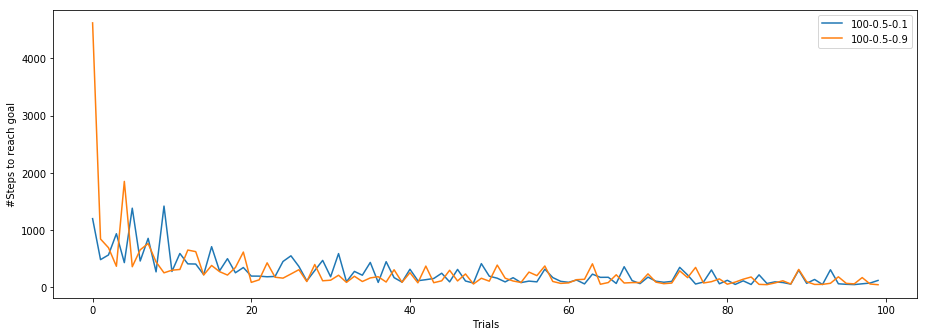

# Plot variation in learning rate
Min steps for 0.1 learningrate=22; 0.4 learningrate=15


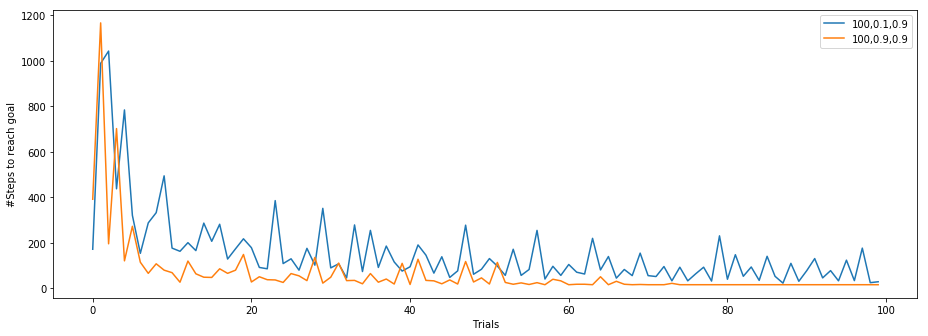

# Plot variation of learning rate
Min steps for 100 repetition=15; 30 repetition=25


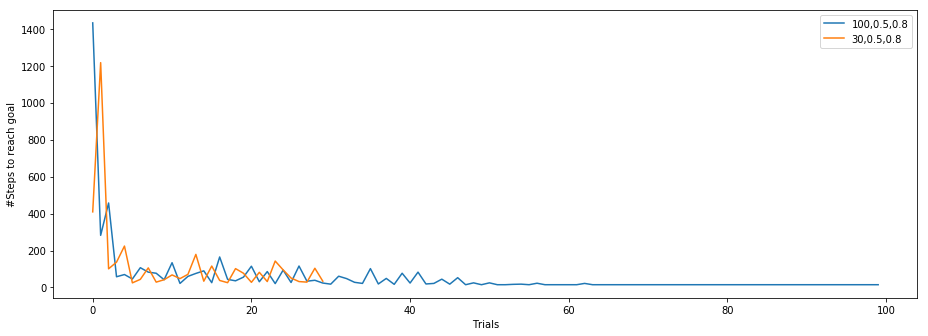

In [85]:
Q1, stepsToGoal1 = trainQ(100, 0.5, 0.1, validMoves_4disk, makeMove_4disk,5)
Q2, stepsToGoal2 = trainQ(100, 0.5, 0.9, validMoves_4disk, makeMove_4disk,5)
print('# Plot variation in epsilon.')
print("Min steps for 0.1 epsilonDecayFactor={}; 0.9 epsilonDecayFactor={}".format(min(stepsToGoal1),min(stepsToGoal2)))

plt.ylabel('#Steps to reach goal')
plt.xlabel('Trials')
plt.plot(stepsToGoal1)
plt.plot(stepsToGoal2)
plt.legend(('100-0.5-0.1','100-0.5-0.9'), loc='upper right')
plt.subplots_adjust(left=0.0, right=2.0, bottom=0.0, top=1.0)
plt.show();

Q3, stepsToGoal3 = trainQ(100, 0.1, 0.9, validMoves_4disk, makeMove_4disk,4)
Q4, stepsToGoal4 = trainQ(100, 0.4, 0.9, validMoves_4disk, makeMove_4disk,4)
print('# Plot variation in learning rate')
print("Min steps for 0.1 learningrate={}; 0.4 learningrate={}".format(min(stepsToGoal3),min(stepsToGoal4)))
plt.subplots_adjust(left=0.0, right=2.0, bottom=0.0, top=1.0)
plt.plot(stepsToGoal3)
plt.plot(stepsToGoal4)
plt.ylabel('#Steps to reach goal')
plt.xlabel('Trials')
plt.legend(('100,0.1,0.9','100,0.9,0.9'), loc='upper right')
plt.show();

Q5, stepsToGoal5 = trainQ(100, 0.5, 0.8, validMoves_4disk, makeMove_4disk,4)
Q6, stepsToGoal6 = trainQ(30, 0.5, 0.8, validMoves_4disk, makeMove_4disk,4)
print('# Plot variation of learning rate')
print("Min steps for 100 repetition={}; 30 repetition={}".format(min(stepsToGoal5),min(stepsToGoal6)))
plt.subplots_adjust(left=0.0, right=2.0, bottom=0.0, top=1.0)
plt.plot(stepsToGoal5)
plt.plot(stepsToGoal6)
plt.ylabel('#Steps to reach goal')
plt.xlabel('Trials')
plt.legend(('100,0.5,0.8','30,0.5,0.8'), loc='upper right')
plt.show();

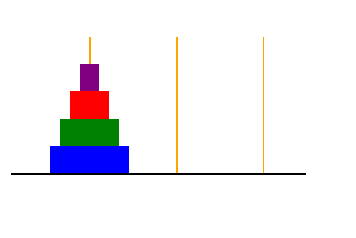

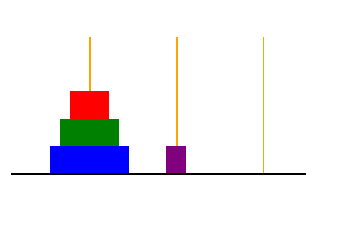

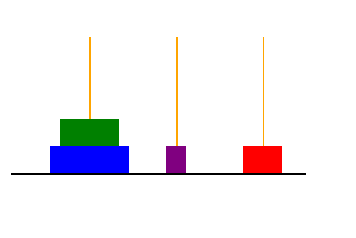

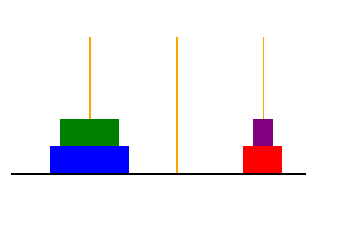

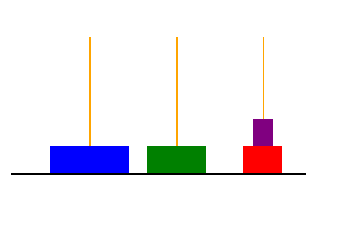

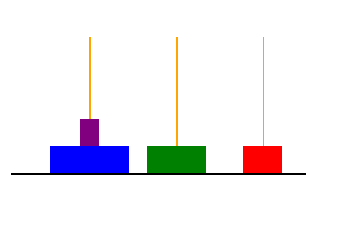

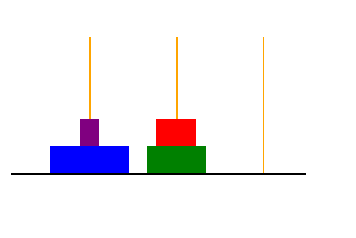

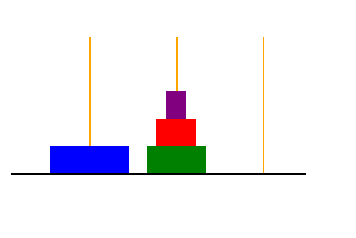

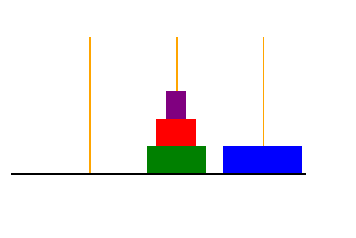

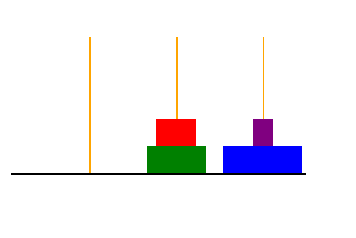

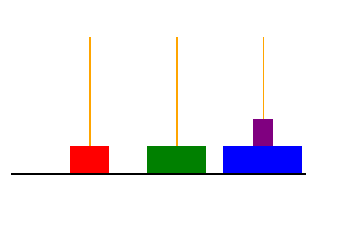

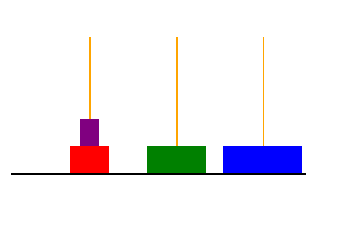

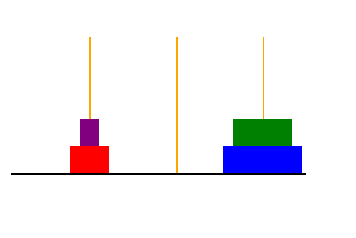

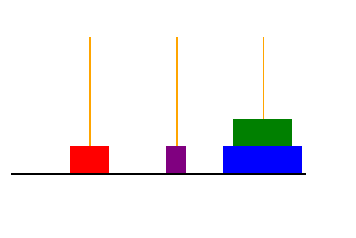

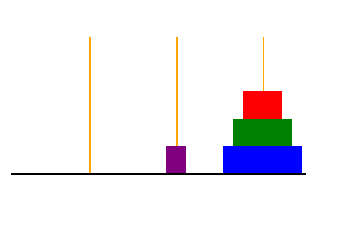

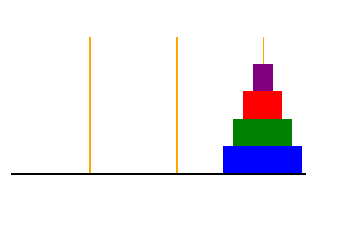

In [86]:
# GUI display
Q, stepsToGoal = trainQ(1000, 0.5, 0.7, validMoves_4disk, makeMove_4disk,4)
path = testQ(Q, 20, validMoves_4disk, makeMove_4disk,4)
for step in path:
    draw(step)

Download and extract `A5grader.py` from [A5grader.tar](http://www.cs.colostate.edu/~anderson/cs440/notebooks/A5grader.tar).

In [87]:
%run -i A5grader.py


Testing validMoves([[1], [2], [3]])

--- 10/10 points. Correctly returned [[1, 2], [1, 3], [2, 3]]

Testing validMoves([[], [], [1, 2, 3]])

--- 10/10 points. Correctly returned [[3, 1], [3, 2]]

Testing makeMove([[], [], [1, 2, 3]], [3, 2])

--- 10/10 points. Correctly returned [[], [1], [2, 3]]

Testing makeMove([[2], [3], [1]], [1, 2])

--- 10/10 points. Correctly returned [[], [2, 3], [1]]

Testing   Q, steps = trainQ(1000, 0.5, 0.7, validMoves, makeMove).

--- 10/10 points. Q dictionary has correct number of entries.

--- 10/10 points. The mean of the number of steps is 7.58 which is correct.

Testing   path = testQ(Q, 20, validMoves, makeMove).

--- 20/20 points. Correctly returns path of length 8, less than 10.

notebook Execution Grade is 80/80

 Remaining 20 points will be based on your text describing the trainQ and test! functions.

notebook FINAL GRADE is __/100
